# Assignment - Recurrent Neural Networks

1. Using the pip install yfinance command as shown in the lesson, select 2 different stocks to be decided by yourself and estimate the future prices of these stocks using LSTM (1-step forecast).

2. Briefly discuss the problems encountered in RNN and why LSTM is needed.

3. Find out what the epoch and batch size parameters are in LSTM. Resolve the 1st question with different values of epoch and batch size, and report the result.

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, timezone

import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_list = ['FMIZP.IS']
stock_prices = yf.download(stock_list,start = '2019-06-14',end = '2021-06-14',
                              interval='1d', prepost=True)
stock_prices["Average"] = (stock_prices["High"] + stock_prices["Low"])/2
stock_prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2019-06-14,15.25,15.27,15.05,15.16,14.195159,13992,15.160
2019-06-17,15.12,15.29,15.10,15.24,14.270066,29464,15.195
2019-06-18,15.23,15.51,15.14,15.35,14.373067,44007,15.325
2019-06-19,15.36,15.46,15.22,15.28,14.307521,27875,15.340
2019-06-20,15.35,15.50,15.22,15.27,14.298158,39733,15.360


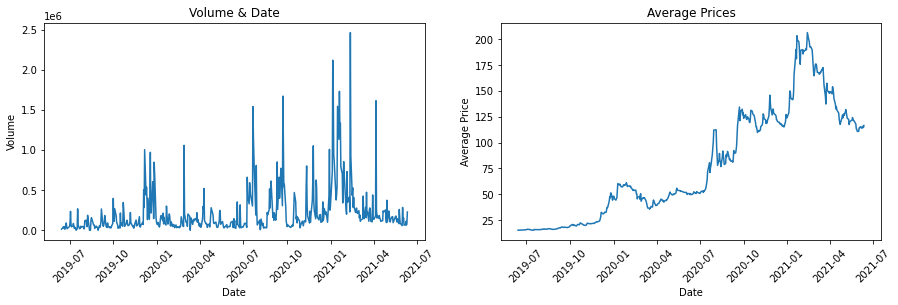

In [3]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.lineplot(x = stock_prices.index, y = stock_prices.Volume)
plt.title("Volume & Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation = 45)

plt.subplot(122)
sns.lineplot(x = stock_prices.index, y = stock_prices.Average)
plt.title("Average Prices")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation = 45)

plt.show()

## For estimation, let's assign the transaction volume and average columns to an array and scale them between 0 and 1.

In [4]:
input_data = stock_prices.iloc[:,[5,6]].values

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_data[:,:])

## We will use the prices and trading volume over the last 50 trading days to estimate stock prices. We will use 30% of our data as a test set. Our target variable will be the price today, and so on.

In [5]:
lookback= 50

test_size=int(.3 * len(stock_prices))
X=[]
y=[]
for i in range(len(stock_prices)-lookback-1):
    t=[]
    for j in range(0,lookback):
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

## Let's check the data. The last value of the X data must be the target value of the previous day.

In [6]:
print(X[1][-1])
print(y[0])
print("-----------")
print(X[100][-1])
print(y[99])

[[0.00923593 0.00535639]]
0.005356394337213868
-----------
[[0.04819811 0.2292015 ]]
0.22920150363381764


## We have successfully prepared our data. LSTM requires 3-D data as input data. These are the number of data, the number of test steps, the number of features to be used as inputs. We can do this with reshape.

In [7]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(454, 50, 2)
(201, 50, 2)


## We're ready now. We can create and fit our model by importing our needs from the Keras library.

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [9]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


## Let's compile the model.

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Now we can fit the model.

In [11]:
model.fit(X, y, epochs=200, batch_size=32, verbose=0)

## Finally, we can make prediction.

In [12]:
predictions= model.predict(X_test)

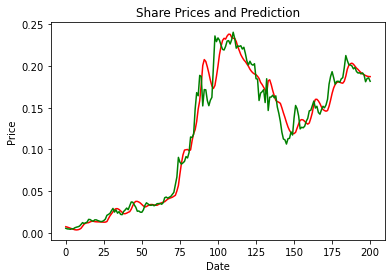

In [13]:
plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Resolve the 1st question with different values of epoch and batch size, and report the result.

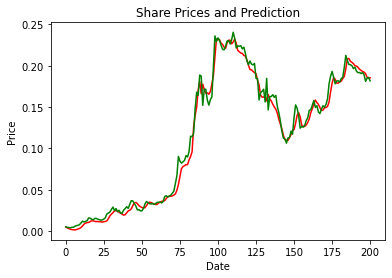

In [14]:
#Epochs 200 to 300
model.fit(X, y, epochs=300, batch_size=32, verbose=0)
predictions= model.predict(X_test)
plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

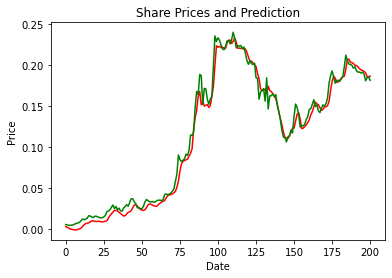

In [15]:
#Batch size 32 to 64
model.fit(X, y, epochs=200, batch_size=64, verbose=0)
predictions= model.predict(X_test)
plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

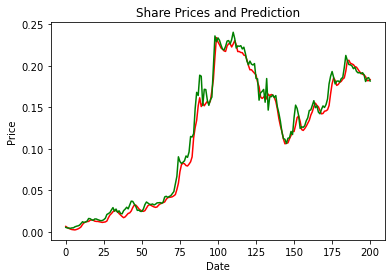

In [16]:
#Epochs 200 to 300
#Batch size 32 to 64
model.fit(X, y, epochs=300, batch_size=64, verbose=0)
predictions= model.predict(X_test)
plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

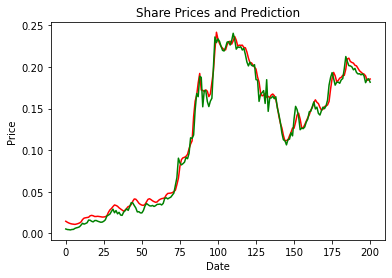

In [17]:
#Epochs 200 to 50
#Batch size 32 to 16
model.fit(X, y, epochs=50, batch_size=16, verbose=0)
predictions= model.predict(X_test)
plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()